# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [23]:
# Wine Quality (PMLB - red subset only)
wine_quality = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_red/wine_quality_red.tsv.gz", sep="\t")

# Drop rows with missing values
wine_quality = wine_quality.dropna()

# Random sample of 10 rows
wine_quality_sample = wine_quality.sample(10)
print("Random Sample of 10 Rows:\n", wine_quality_sample)

Random Sample of 10 Rows:
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
222             6.8             0.610         0.04             1.5      0.057   
1533            8.0             0.390         0.30             1.9      0.074   
786             9.9             0.350         0.41             2.3      0.083   
827             7.1             0.460         0.14             2.8      0.076   
190             8.2             0.500         0.35             2.9      0.077   
332             8.0             0.580         0.28             3.2      0.066   
266             8.1             0.870         0.00             3.3      0.096   
1238            8.1             0.730         0.00             2.5      0.081   
555            15.5             0.645         0.49             4.2      0.095   
486            10.2             0.670         0.39             1.9      0.054   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
222 

YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [24]:
# List all Wine Quality (PMLB copy) features
wine_quality_columns = wine_quality.columns.tolist()
print("Wine Quality Features:\n", wine_quality_columns)

# Info and statistics on the Breast Cancer Wisconsin (PMLB copy)dataset
wine_quality.info()
wine_quality.describe()

Wine Quality Features:
 ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'target']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  target             

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


YOUR ANSWERS HERE

In [25]:
# Explanation of each feature (12 columns):
# There are 12 columns in total--1 target column (categorical), 11 feature columns (continuous).
# There are no missing values in the dataset as there are 1599 non-null entries for each of the 12 columns.
# According to the UC Irvine Machine Learning Repository, the first column, "fixed acidity" is continuous and represents acidity in wine.
# The second column, "volatile acidity" is also continuous and represents volatile acidity in wine.
# The third column, "citric acid" is continuous and represents citric acid in wine.
# The fourth column, "residual sugar" is continuous and represents residual sugar content in wine.
# The fifth column, "chlorides" is continuous and represents chloride content in wine.
# The sixth column, "free sulfur dioxide" is continuous and represents free sulfur dioxide content in wine.
# The seventh column, "total sulfur dioxide" is continuous and represents total sulfur dioxide content in wine.
# The eighth column, "density" is continuous and represents density of wine.
# The ninth column, "pH" is continuous and represents pH of wine.
# The tenth column, "sulphates" is continuous and represents sulphates in wine.
# The eleventh column, "alcohol" is continuous and represents alcohol content in wine.
# Finally, the twelfth column, "quality" is the target column (categorical) and represents the quality rating of the wine on a scale from 0 to 10.


### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

Number of Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
target                  0
dtype: int64
Number of Duplicate Values:
 240


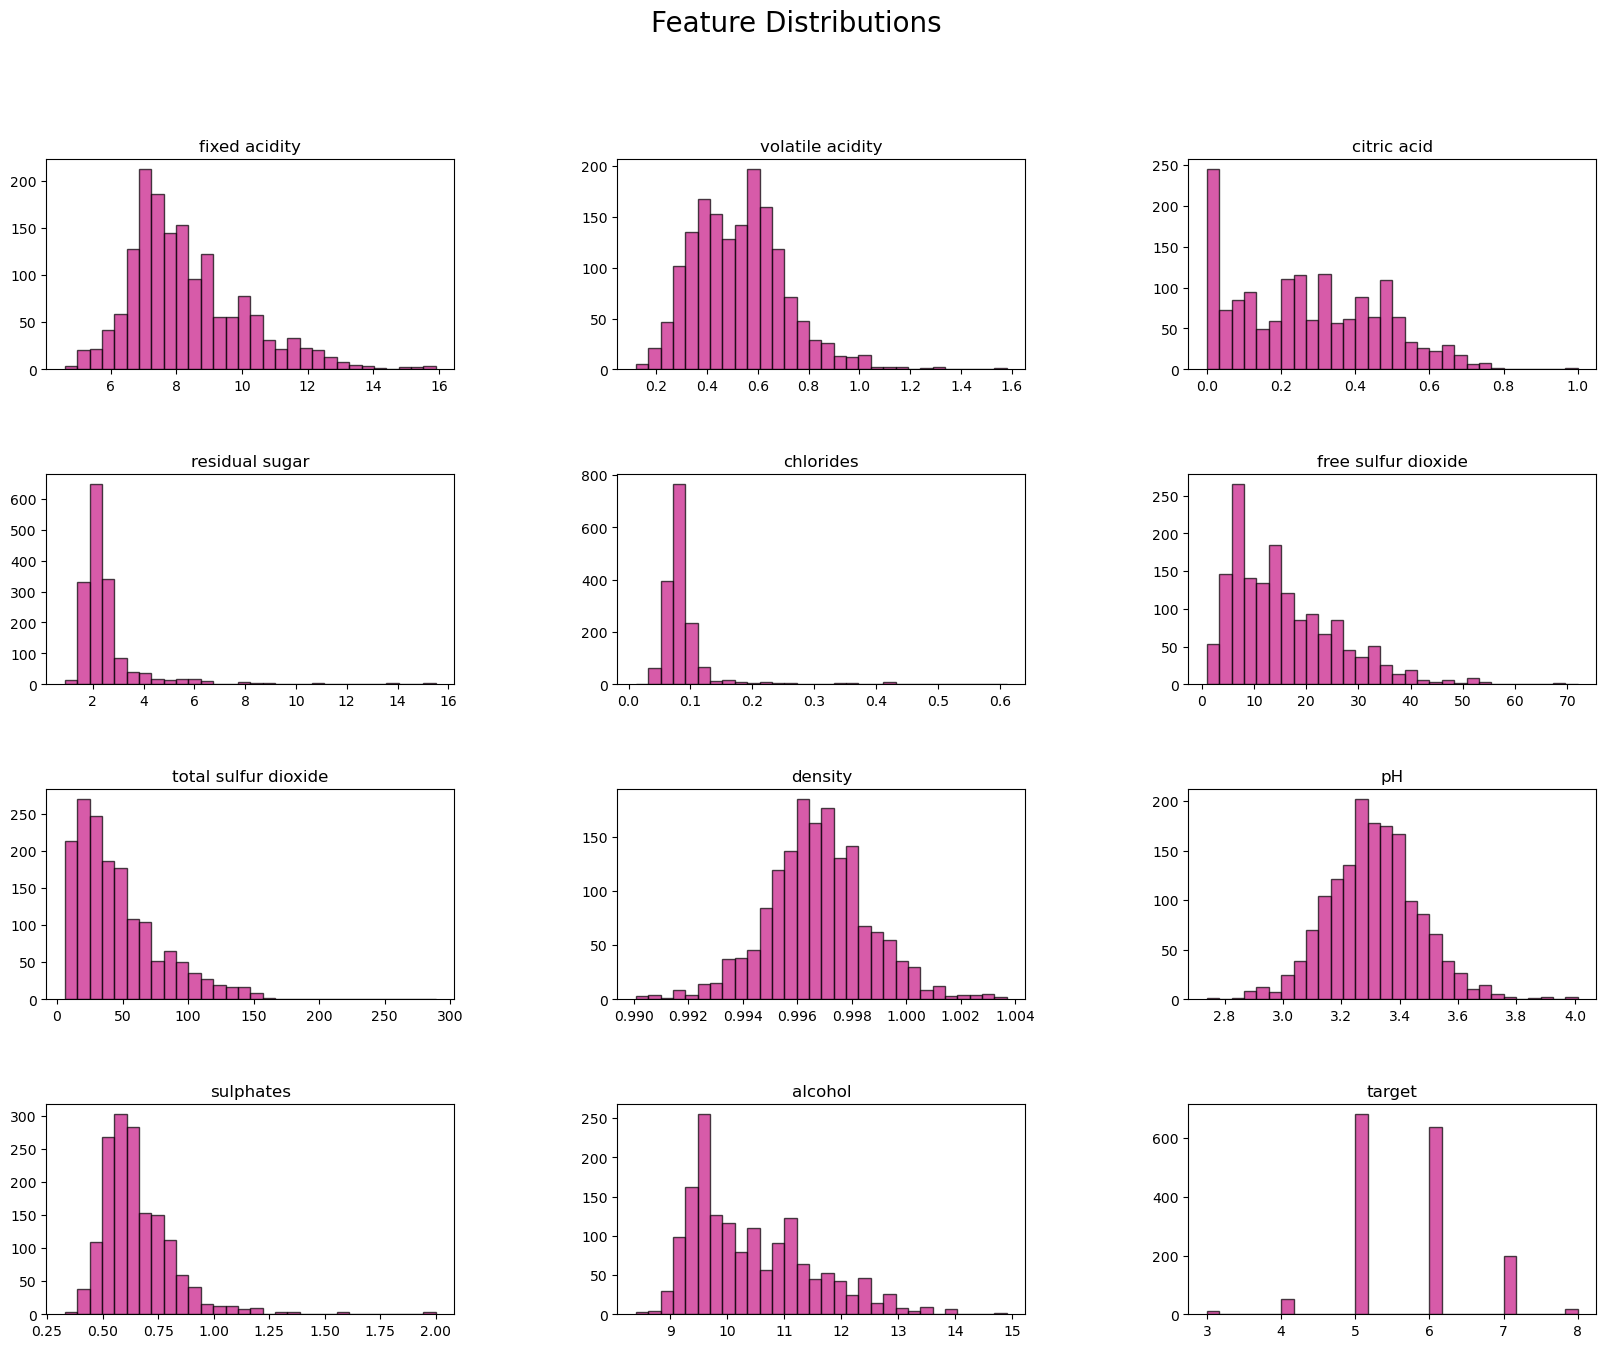

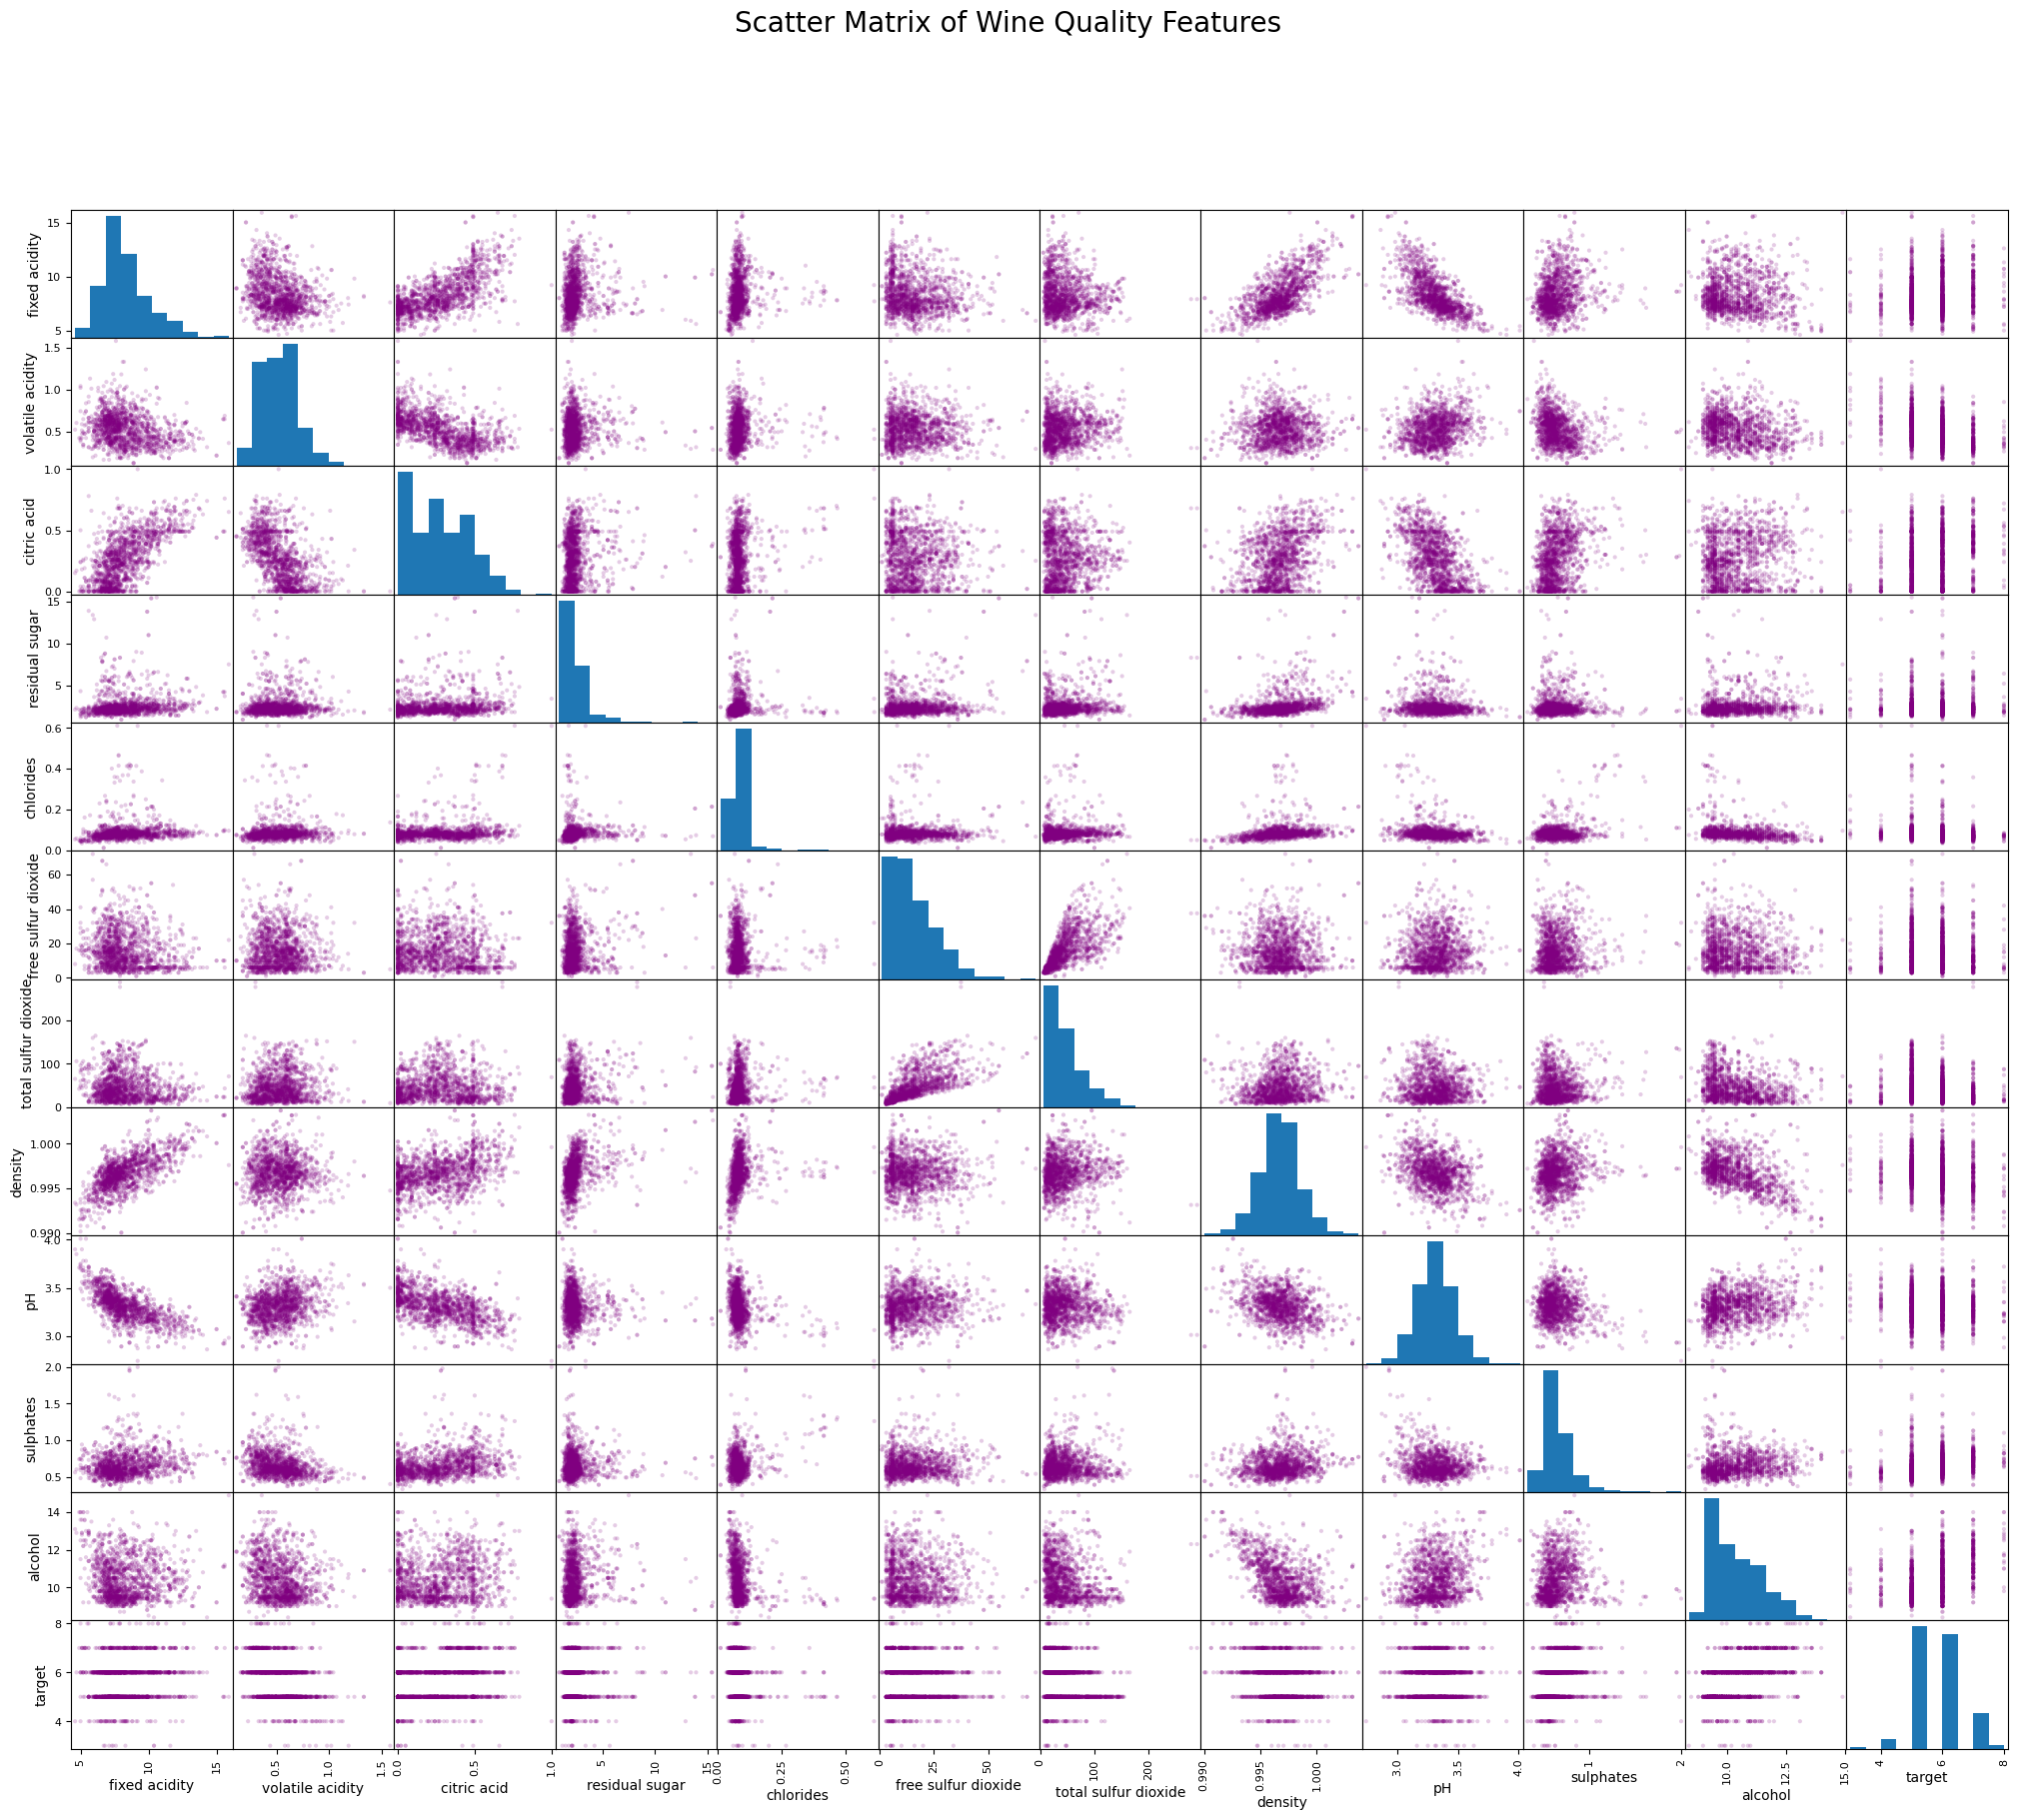

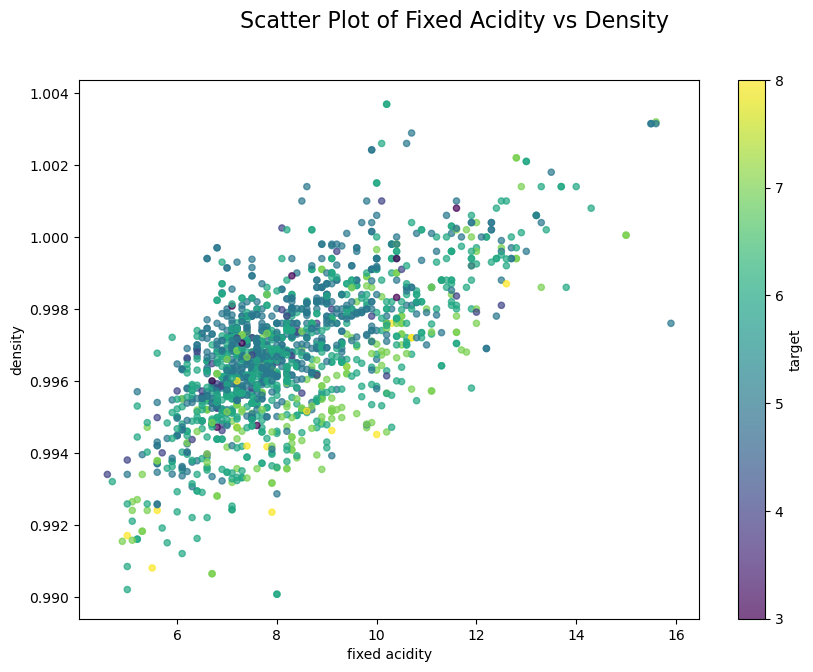

In [105]:
# Exploratory Data Analysis (EDA) of Wine Quality (PMLB copy) dataset

# Check for missing and duplicate values
missing_values = wine_quality.isnull().sum()
duplicate_values = wine_quality.duplicated().sum()
print("Number of Missing Values:\n", missing_values)
print("Number of Duplicate Values:\n", duplicate_values)

# Histogram of each feature in dataset
wine_quality.hist(grid=False, bins=30, figsize=(20, 15), color='mediumvioletred', edgecolor='black', alpha=0.7)
# Adjust spacing between plots
plt.subplots_adjust(hspace=0.5, wspace=0.4) 
# Add title and labels
plt.suptitle("Feature Distributions", fontsize=20)
plt.show()

# Scatter matrix to visualize relationships between features
pd.plotting.scatter_matrix(wine_quality, figsize=(25, 20), color='purple', alpha=0.2)
# Add title and labels
plt.suptitle("Scatter Matrix of Wine Quality Features", fontsize=20)
plt.show()

# Scatter plot comparing two features against the target
wine_quality.plot.scatter("fixed acidity", "density", c="target", figsize=(10, 7), colormap="viridis", alpha=0.7)
# Add title and labels
plt.suptitle("Scatter Plot of Fixed Acidity vs Density", fontsize=16)
plt.xlabel("fixed acidity")
plt.ylabel("density")
plt.show()

YOUR ANSWERS HERE

KeyError: 'SOME COLUMN'

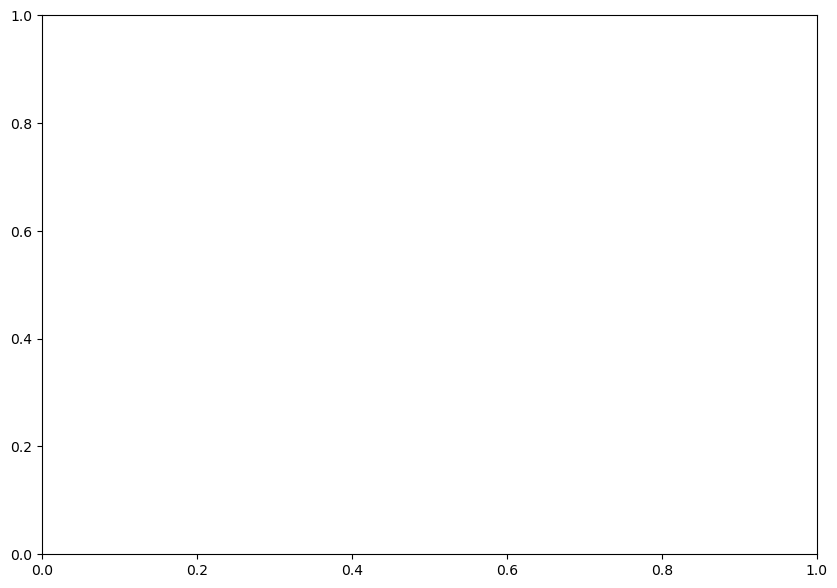

In [110]:
# Explanation of three charts I find most interesting:
#1. 
wine_quality.plot.scatter("SOME COLUMN", "target", color="teal", figsize=(10, 7), alpha=0.6)
plt.suptitle("Scatter Plot of Fixed Acidity vs Quality", fontsize=16)
plt.xlabel("fixed acidity")
plt.ylabel("quality")
plt.show()

#2. 


#3. 

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

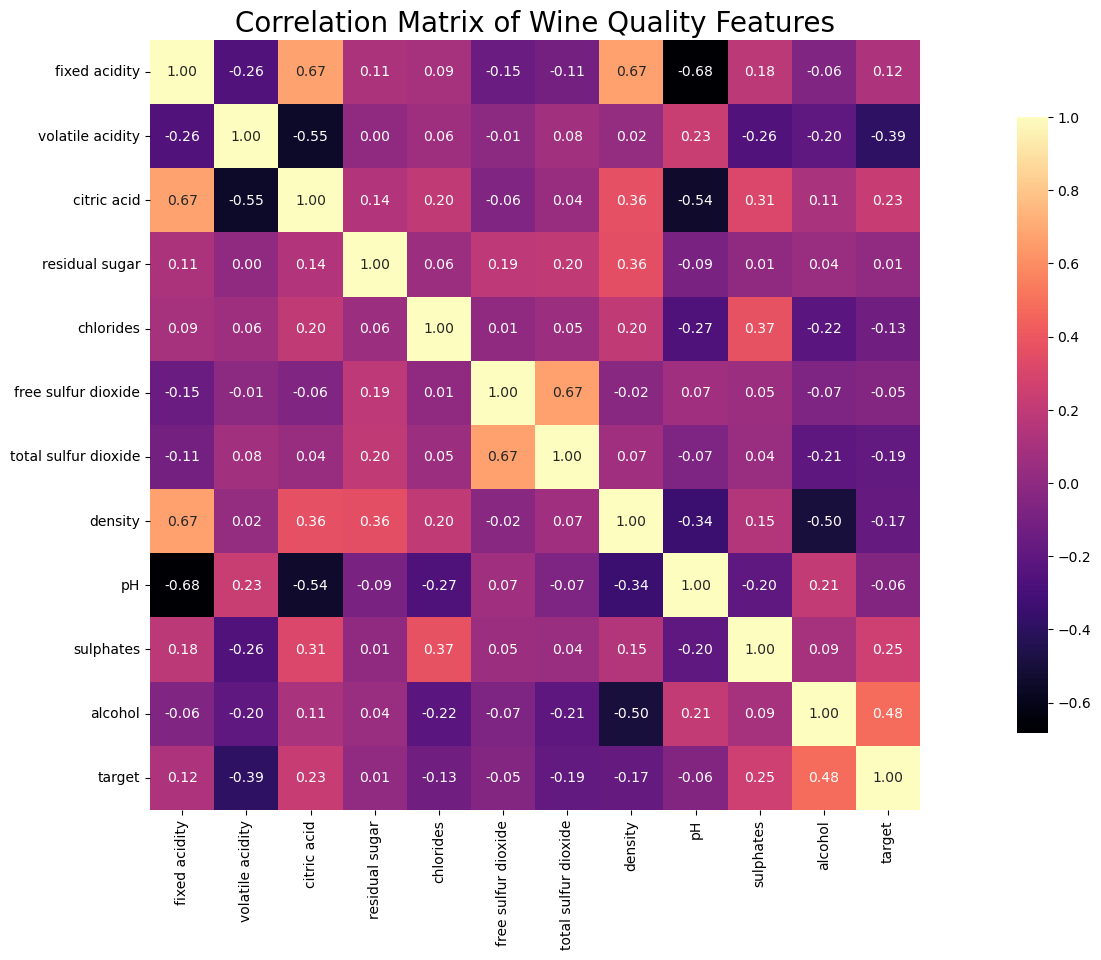

In [72]:
# Correlation Matrix

import seaborn as sns

# Plot correlation matrix
correlation_matrix = wine_quality.corr()
plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="magma", square=True, cbar_kws={"shrink": .8})

# Add title and labels
plt.title("Correlation Matrix of Wine Quality Features", fontsize=20)
plt.show()

YOUR ANSWERS HERE

In [ ]:
# Explanation of Correlation Matrix:
# The correlation matrix shows "fixed acidity" and "density" have a strong positive correlation of 0.67.
# The correlation matrix also shows "fixed acidity" and citric acid" have a strong positive correlation of 0.67.

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE